# STOCK PRICE PREDICTION

In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np



In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as pdr


In [4]:
st_df=pdr.get_data_tiingo('AAPL',api_key='0ed755a72a4c569099d3bd0cea444c58eca3cb4a')

C:\Users\ansht\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
st_df.to_csv('APPL.csv')
st_df=pd.read_csv('APPL.csv')

In [6]:
st_df.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-04-13 00:00:00+00:00,174.73,175.84,173.85,174.78,25124255,41.639642,41.904164,41.429930,41.651557,100497020,0.0,1.0
1,AAPL,2018-04-16 00:00:00+00:00,175.82,176.19,174.83,175.03,21578420,41.899398,41.987572,41.663473,41.711134,86313680,0.0,1.0
2,AAPL,2018-04-17 00:00:00+00:00,178.24,178.94,176.41,176.49,26605442,42.476105,42.642921,42.040000,42.059065,106421768,0.0,1.0
3,AAPL,2018-04-18 00:00:00+00:00,177.84,178.82,176.88,177.81,20754538,42.380781,42.614324,42.152005,42.373632,83018152,0.0,1.0
4,AAPL,2018-04-19 00:00:00+00:00,172.80,175.39,172.66,173.76,34808800,41.179706,41.796925,41.146343,41.408483,139235200,0.0,1.0


In [7]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [8]:
st_df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [9]:
st_df1=st_df.reset_index()['close']

In [10]:
st_df1.shape

(1257,)

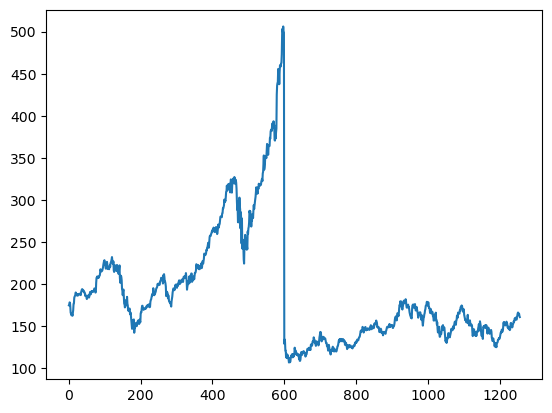

In [11]:
import matplotlib.pyplot as plt
plt.plot(st_df1)

In [15]:
# using Long Term Short Memory for this
#Normalizing using MinMax scaler
from sklearn.preprocessing import MinMaxScaler


In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
st_df1=scaler.fit_transform(np.array(st_df1).reshape(-1,1))

In [17]:
st_df1.shape

(1257, 1)

# TRAINING & TESTING

In [18]:
training_size=int(len(st_df1)*0.65)
test_size=len(st_df1)-training_size
train_data,test_data=st_df1[0:training_size,:],st_df1[training_size:len(st_df1),:1]

In [19]:
training_size,test_size

(817, 440)

In [23]:
len(train_data)

817

In [20]:
train_data

array([[1.70043832e-01],
       [1.72773951e-01],
       [1.78835316e-01],
       [1.77833438e-01],
       [1.65209768e-01],
       [1.47476518e-01],
       [1.46274264e-01],
       [1.40513463e-01],
       [1.42291797e-01],
       [1.43719474e-01],
       [1.38960551e-01],
       [1.46324358e-01],
       [1.55942392e-01],
       [1.74652473e-01],
       [1.75453976e-01],
       [1.92836569e-01],
       [1.96167815e-01],
       [1.98396994e-01],
       [2.01678147e-01],
       [2.08390733e-01],
       [2.04758923e-01],
       [2.03656857e-01],
       [1.99373826e-01],
       [2.03731997e-01],
       [2.00751409e-01],
       [1.99048215e-01],
       [2.02354415e-01],
       [2.01177207e-01],
       [2.04182843e-01],
       [2.03656857e-01],
       [2.04733876e-01],
       [2.03030683e-01],
       [2.02028804e-01],
       [2.00450845e-01],
       [2.08891672e-01],
       [2.12874139e-01],
       [2.16581090e-01],
       [2.18259236e-01],
       [2.16956794e-01],
       [2.12548528e-01],


In [32]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return numpy.array(dataX), numpy.array(dataY)

In [33]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [35]:
print(X_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [36]:
print(X_test.shape), print(Y_test.shape)

(1, 100)
(1,)


(None, None)

In [37]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [38]:
!pip install keras-tuner

In [39]:
import tensorflow as tf
from tensorflow import keras


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 14s 14s/step - loss: 0.0866 - val_loss: 0.0113
Epoch 2/100
1/1 [==============================] - 0s 192ms/step - loss: 0.0594 - val_loss: 0.0047
Epoch 3/100
1/1 [==============================] - 0s 224ms/step - loss: 0.0349 - val_loss: 5.1882e-04
Epoch 4/100
1/1 [==============================] - 0s 200ms/step - loss: 0.0138 - val_loss: 0.0013
Epoch 5/100
1/1 [==============================] - 0s 192ms/step - loss: 8.6129e-04 - val_loss: 0.0112
Epoch 6/100
1/1 [==============================] - 0s 184ms/step - loss: 0.0059 - val_loss: 0.0189
Epoch 7/100
1/1 [==============================] - 0s 224ms/step - loss: 0.0151 - val_loss: 0.0162
Epoch 8/100
1/1 [==============================] - 0s 201ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 9/100
1/1 [==============================] - 0s 208ms/step - loss: 0.0040 - val_loss: 0.0052
Epoch 10/100
1/1 [==============================] - 0s 209ms/step - loss: 3.7389e-04 - val_loss: 0.002

In [45]:
#Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 56ms/step


In [46]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [47]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.00012207824659848932